# **Multi-Level Marketing in World of Warcraft using Neo4j**

## 1, Multi-Level Marketing là gì? 
**Multi-Level Marketing (MLM)** là một hình thức kinh doanh mà người bán hàng không chỉ kiếm tiền từ việc bán hàng mà còn kiếm tiền từ việc tuyển thành viên khác vào hệ thống. Mỗi thành viên mới được tuyển vào sẽ tạo ra một cấp dưới cho người tuyển dụng. Người tuyển dụng sẽ nhận được một phần hoa hồng từ doanh số bán hàng của cấp dưới. Cấp dưới cũng có thể tuyển thêm thành viên mới và tạo ra một cấp dưới khác. Người tuyển dụng sẽ nhận được một phần hoa hồng từ doanh số bán hàng của cấp dưới thứ hai và tiếp tục như vậy.

### Tiếp thị đa cấp trong World of Warcraft bằng Neo4j
Trong thế giới ảo của trò chơi Warcraft, tiếp thị đa cấp (MLM) không phải là một khái niệm xa lạ. Các người chơi thường xuyên tham gia vào các hệ thống MLM để tăng cường khả năng chiến đấu của họ và kiếm thêm tiền trong trò chơi. Tuy nhiên, liệu chúng ta có thể áp dụng các nguyên tắc của MLM vào thế giới thực bên ngoài trò chơi?

Việc lập kế hoạch và tính toán thù lao trong các tổ chức bán hàng phức tạp có thể gây áp lực rất lớn đối với cơ sở dữ liệu truyền thống. Các tổ chức đủ lớn thường sẽ kết hợp các quy trình này qua đêm hoặc thành công việc hàng tuần.

Với mục đích của bài này, chúng ta hãy xem Slashco: “bang hội” tiếp thị đa cấp hot nhất trong World of Warcraft

Trong bang hội này, các "cộng sự" có thể tham gia và bán thiết bị phiêu lưu tốt nhất của Slashco cho nhiều người ở Azeroth cũng như chiêu mộ bạn bè và gia đình của họ để bán các sản phẩm của Slashco. Khi một cộng sự tuyển dụng ai đó vào bang hội, thành viên mới đó sẽ trở thành một phần của “hạ lưu” của cộng sự đó. Với tư cách là tiền bản quyền khi thu hút thành viên mới này, các cộng sự sẽ nhận được một khoản hoa hồng nhỏ cho mỗi mặt hàng được bán bởi các thành viên “hạ nguồn” của họ.

Trong lịch trình trả thưởng này, chúng tôi có các pháp sư bán hàng, những người sẽ vừa trực tiếp bán sản phẩm vừa tuyển người để bán sản phẩm thay mặt cho Slashco. Tôi đã tạo một mô hình mẫu dựa trên mô hình tiếp thị đa cấp phổ biến. Nó bao gồm bốn dòng thu nhập:
- Bán hàng trực tiếp: Đối với mỗi mặt hàng mà thành viên trong nhóm bán trực tiếp, họ sẽ kiếm được hoa hồng.
- Tiền bản quyền hạ nguồn: Phần trăm kiếm được từ giá bán lẻ của các mặt hàng được bán bởi những người "ở hạ lưu của họ", nghĩa là những người mà họ đã tuyển dụng để làm việc cho Slashco và nói rộng hơn là những người mà họ đã tuyển dụng
- Lợi nhuận bán buôn: Phần trăm kiếm được từ hàng hóa được bán cho những người “ở hạ nguồn” (những hàng hóa này sau đó sẽ được bán lại cho người tiêu dùng).
- Tiền bản quyền bán hàng toàn cầu: Tỷ lệ phần trăm của tổng doanh số bán hàng được thực hiện bởi những người trong Slashco (còn gọi là chia sẻ doanh thu).

Dưới đây là ví dụ về cách một tổ chức MLM điển hình có thể trả thù lao cho các cộng sự của mình:

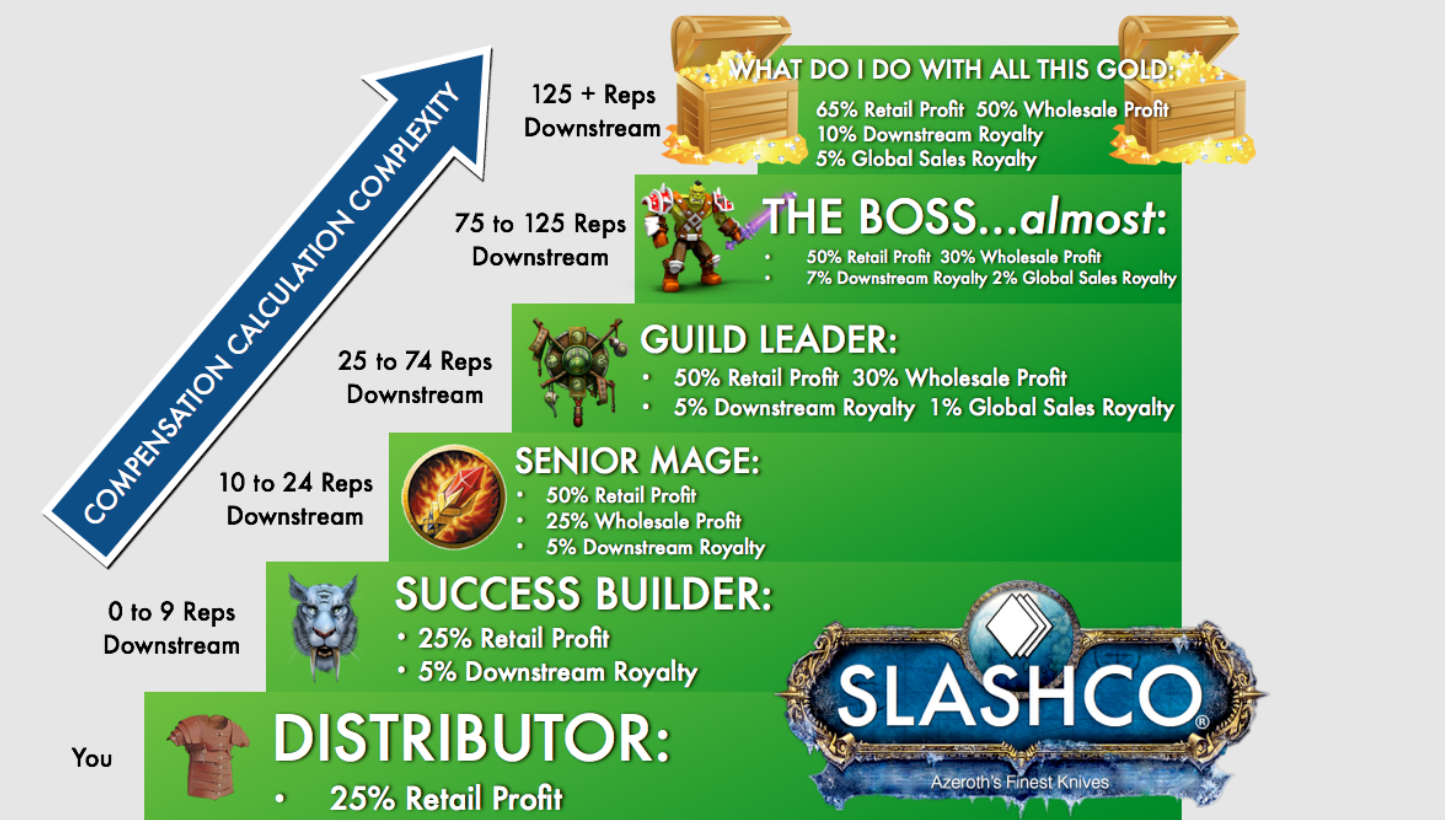

Chúng tôi thấy rằng, tùy thuộc vào cấp độ của bạn, cách bạn được trả lương cho cả doanh số bán hàng trực tiếp và dòng thu nhập thụ động của mình có thể khác nhau rất nhiều. Như vậy, việc tính toán mức hoa hồng có thể rất khó khăn.

Dữ liệu về các giao dịch và cấp bậc của các thành viên trong tổ chức MLM có thể được lưu trữ trong một cơ sở dữ liệu đồ thị. Trong bài viết này, chúng ta sẽ sử dụng Neo4j, một cơ sở dữ liệu đồ thị phổ biến, để lưu trữ và truy vấn dữ liệu về tổ chức MLM của Slashco.



Trước khi chúng tôi thực sự tải bất kỳ dữ liệu nào vào Neo4j, điều quan trọng là phải biết những câu hỏi nào sẽ quan trọng đối với hoạt động kinh doanh của chúng tôi. Trong trường hợp này, chúng tôi đang lập mô hình một công cụ trả thưởng cho doanh số bán hàng. Các truy vấn phổ biến nhất của chúng tôi có thể giống như:
- Hoa hồng theo từng đại diện, theo thời gian, theo quy định lương thưởng
- Hoa hồng cho mỗi đại diện, hàng năm theo quy định về lương thưởng
- Bảng xếp hạng bán hàng
- Đại diện bán hàng hàng đầu theo tổng doanh số
- Đại diện bán hàng hàng đầu theo giao dịch lớn nhất
- Báo cáo toàn cầu
- Doanh số theo kỳ
- Mặt hàng bán chạy nhất
- Khuyến nghị
- Những mặt hàng nào thường được bán cùng nhau nhất?

Khi biết những câu hỏi này, chúng ta có thể xây dựng một mô hình giúp dễ dàng trả lời những câu hỏi đó một cách nhanh chóng và hiệu quả.

# 2, Mô hình dữ liệu ứng dụng trả hoa hồng bán hàng của Slaschco:

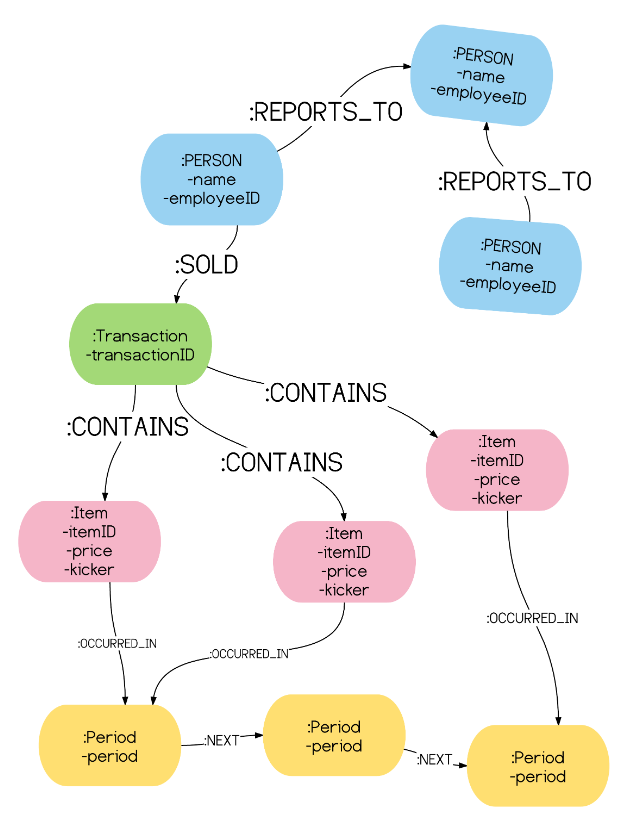

Các file dữ liệu cho bài toán MLM:
Các dữ liệu được lưu trữ trong các file CSV sau:
- employees.csv :   employeeID, name, reportsTo.
- item.csv :   item, factor, name, price, wprice, kicker.
- transactions.csv : transactionID, salesRepID, item1, item2, item3, period.

Trước khi nhập dữ liệu, chúng ta nên chuẩn bị cơ sở dữ liệu bằng cách tạo các chỉ mục và ràng buộc. Cần đảm bảo rằng các nút `Person`, `Item`, `Transaction`, và `Period` có các thuộc tính id duy nhất bằng cách tạo các ràng buộc đối với chúng. Tạo một ràng buộc duy nhất cũng ngầm tạo ra một chỉ mục. Bằng cách lập chỉ mục thuộc tính `id`, node lookup (ví dụ: bằng MATCH) sẽ nhanh hơn nhiều.

- Tạo một ràng buộc trên thuộc tính&nbsp;<code>employeeID</code>&nbsp;của các nút&nbsp;<code>Person</code>&nbsp;để đảm bảo rằng các nút có nhãn&nbsp;<code>Person</code>&nbsp;sẽ có thuộc tính&nbsp;<code>employeeID</code>&nbsp;duy nhất.</li>

In [ ]:
CREATE CONSTRAINT employeeIDConstraint FOR (p:Person) REQUIRE p.employeeID IS UNIQUE;

- Tạo ràng buộc trên thuộc tính&nbsp;<code>itemID</code>&nbsp;của&nbsp;<code>Item</code>&nbsp;node.

In [ ]:
CREATE CONSTRAINT itemIDConstraint FOR (i:Item) REQUIRE i.itemID IS UNIQUE;

- Tương tự cho các nút&nbsp;<code>Transaction</code>&nbsp;và&nbsp;<code>Period</code>

In [ ]:

CREATE CONSTRAINT transactionIDConstraint FOR (t:Transaction) REQUIRE t.transactionID IS UNIQUE;
CREATE CONSTRAINT periodContraint FOR (p:Period) REQUIRE p.period IS UNIQUE;

- Tạo một index trên thuộc tính&nbsp;<code>price</code>&nbsp;của&nbsp;<code>Item</code>&nbsp;node

In [ ]:
CREATE INDEX FOR (i:Item) ON (i.price);
CREATE INDEX FOR (i:Item) ON (i.wholesalePrice);

- Tạo 52 nút Period để đại diện cho mỗi tuần trong năm: 

In [ ]:
WITH range(1,52) as periods
FOREACH (period IN periods |
	MERGE (p:Period {period:period}));

- Tạo quan hệ&nbsp;<code>NEXT</code>&nbsp;giữa các nút&nbsp;<code>Period</code>&nbsp;để biểu diễn thứ tự tuần trong năm.

In [ ]:
MATCH (p:Period)
WITH p
ORDER BY p.period
WITH COLLECT(p) as periods
FOREACH (i in RANGE(0, size(periods)-2) |
	FOREACH (p1 in [periods[i]] |
		FOREACH (p2 in [periods[i+1]] |
			MERGE (p1)-[:NEXT]->(p2))));

- Tải dữ liệu từ các file .csv vào Neo4j. Đồng thời tạo các nút và quan hệ tương ứng.

In [ ]:
LOAD CSV WITH HEADERS FROM "https://raw.githubusercontent.com/NgocTanHoang/neo4j_MLM/main/data/item.csv" as line
WITH line, toFLOAT(line.price) as price, toInteger(line.item) as itemID, toFLOAT(line.kicker) as kick, toFLOAT(line.wprice) as wholesale
CREATE (:Item {itemID:itemID, name:line.name, price:price, kicker:kick, wholesalePrice:wholesale});
//
LOAD CSV WITH HEADERS FROM "https://raw.githubusercontent.com/NgocTanHoang/neo4j_MLM/main/data/employees.csv" as line
WITH line, toInteger(line.employeeID) as empID
CREATE (:Person {employeeID:empID, name:line.name});
//
LOAD CSV WITH HEADERS FROM "https://raw.githubusercontent.com/NgocTanHoang/neo4j_MLM/main/data/employees.csv" as line
WITH line, toInteger(line.employeeID) as empID, toInteger(line.reportsTo) as reportsToID
MATCH (sub:Person {employeeID:empID}), (boss:Person {employeeID:reportsToID})
MERGE (sub)-[:REPORTS_TO]->(boss);
//
LOAD CSV WITH HEADERS FROM "https://raw.githubusercontent.com/NgocTanHoang/neo4j_MLM/main/data/transactions.csv" as line
WITH line, toInteger(line.transactionID) as transID
CREATE (:Transaction {transactionID:transID});
//
LOAD CSV WITH HEADERS FROM "https://raw.githubusercontent.com/NgocTanHoang/neo4j_MLM/main/data/transactions.csv" as line
WITH line, toInteger(line.transactionID) as transID, toInteger(line.period) as period
MATCH (t:Transaction {transactionID:transID}), (p:Period {period:period})
CREATE (t)-[:OCCURRED_IN]->(p);
//
LOAD CSV WITH HEADERS FROM "https://raw.githubusercontent.com/NgocTanHoang/neo4j_MLM/main/data/transactions.csv" as line
WITH line,
toInteger(line.transactionID) as transID,
toInteger(line.item1) as itemID1,
toInteger(line.item2) as itemID2,
toInteger(line.item3) as itemID3
MATCH
(tx:Transaction {transactionID:transID}),
(i1:Item {itemID:itemID1}),
(i2:Item {itemID:itemID2}),
(i3:Item {itemID:itemID3})
CREATE
(tx)-[:CONTAINS]->(i1),
(tx)-[:CONTAINS]->(i2),
(tx)-[:CONTAINS]->(i3);
//
LOAD CSV WITH HEADERS FROM "https://raw.githubusercontent.com/NgocTanHoang/neo4j_MLM/main/data/transactions.csv" as line
WITH line,
toInteger(line.transactionID) as transID,
toInteger(line.salesRepID) as repID
MATCH (rep:Person {employeeID:repID}),
(tx:Transaction {transactionID:transID})
CREATE
(rep)-[:SOLD]->(tx);

- Tạo level cho các cộng tác viên, dựa trên số lượng cấp dưới mà họ có.

In [ ]:
MATCH (target:Person)<-[r:REPORTS_TO*..]-(e)
WITH target, count(e) as totalReports
SET target.reportsCount = totalReports
WITH target,
//setting the right "level" based on number of reports
CASE
WHEN target.reportsCount > 124
THEN 6
WHEN target.reportsCount < 124 and target.reportsCount >= 75
THEN 5
WHEN target.reportsCount < 75 and target.reportsCount >= 25
THEN 4
WHEN target.reportsCount < 25 and target.reportsCount >= 10
THEN 3
WHEN target.reportsCount < 10 and target.reportsCount >= 2
THEN 2
ELSE 1
END AS levels
SET target.level = levels;

# 3, Chạy các đoạn mã trên trong Neo4j

- Tạo các ràng buộc và index:

 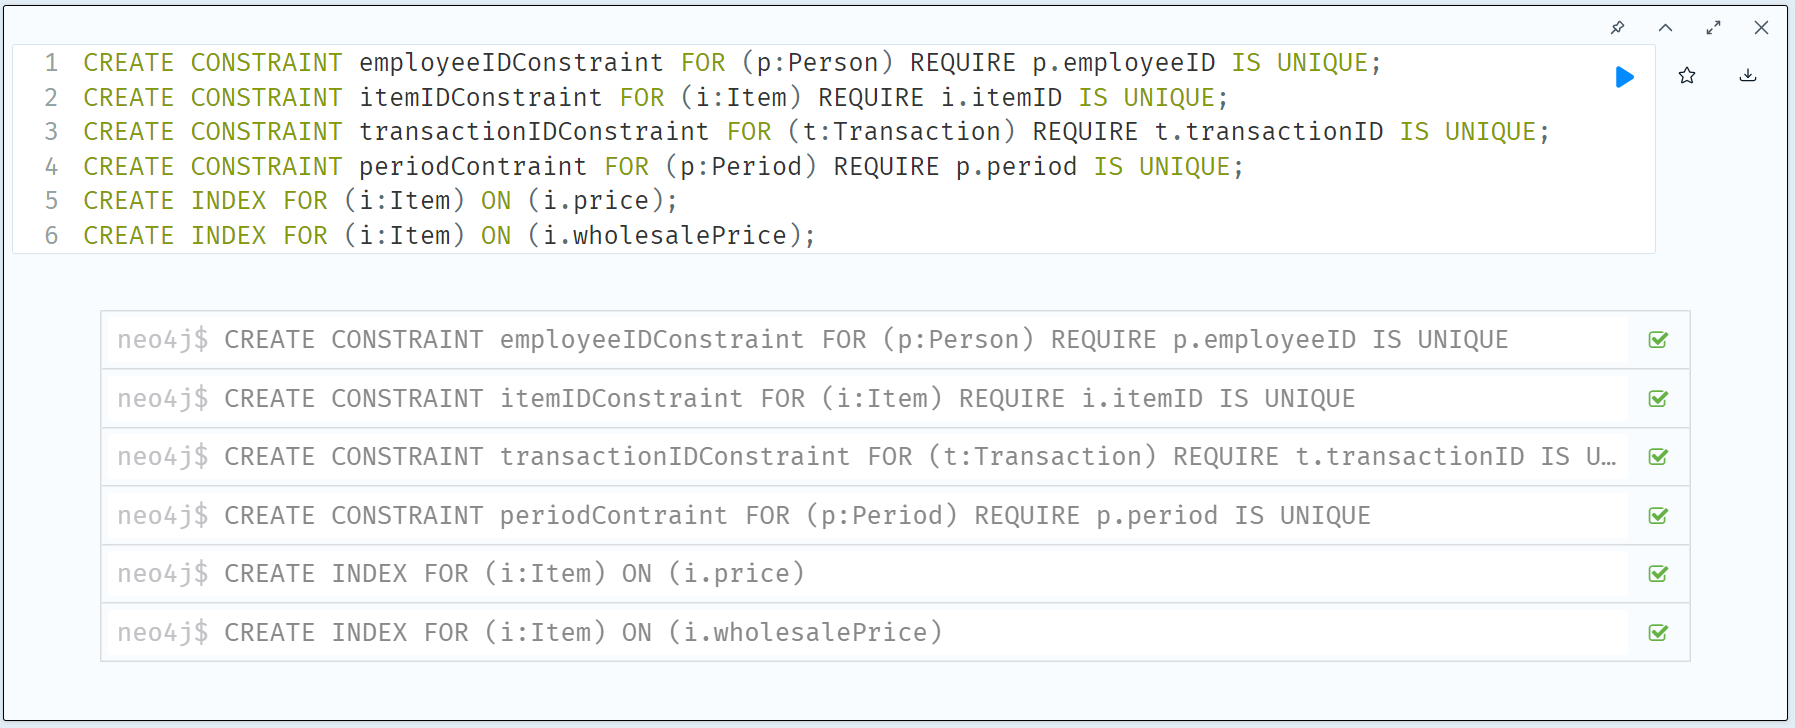

- Tạo 52 Period node:

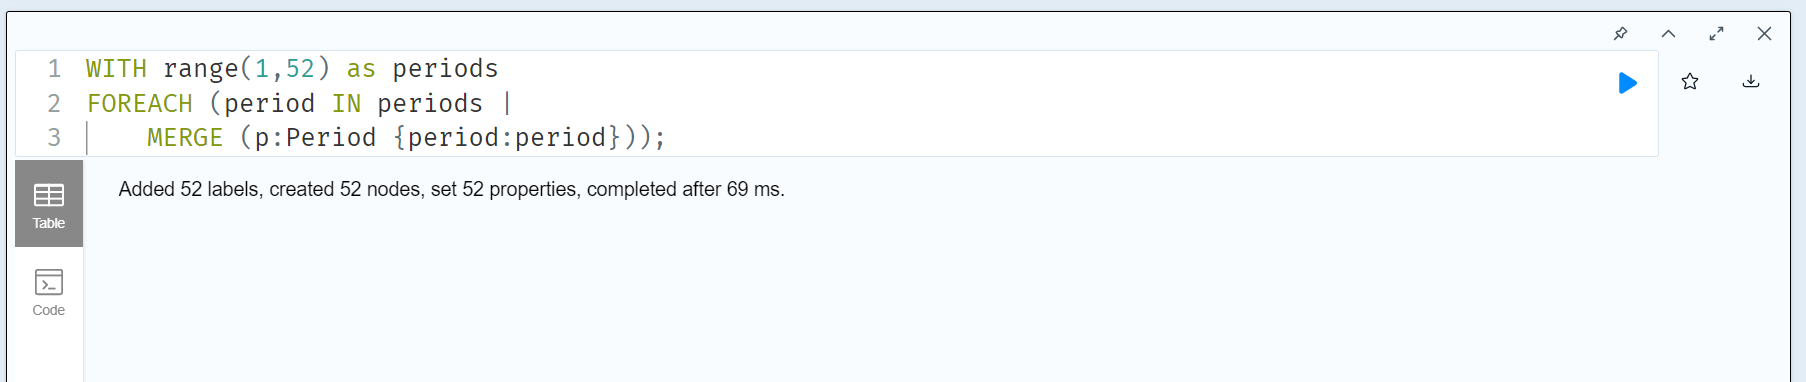

- Tạo quan hệ NEXT giữa các Period node

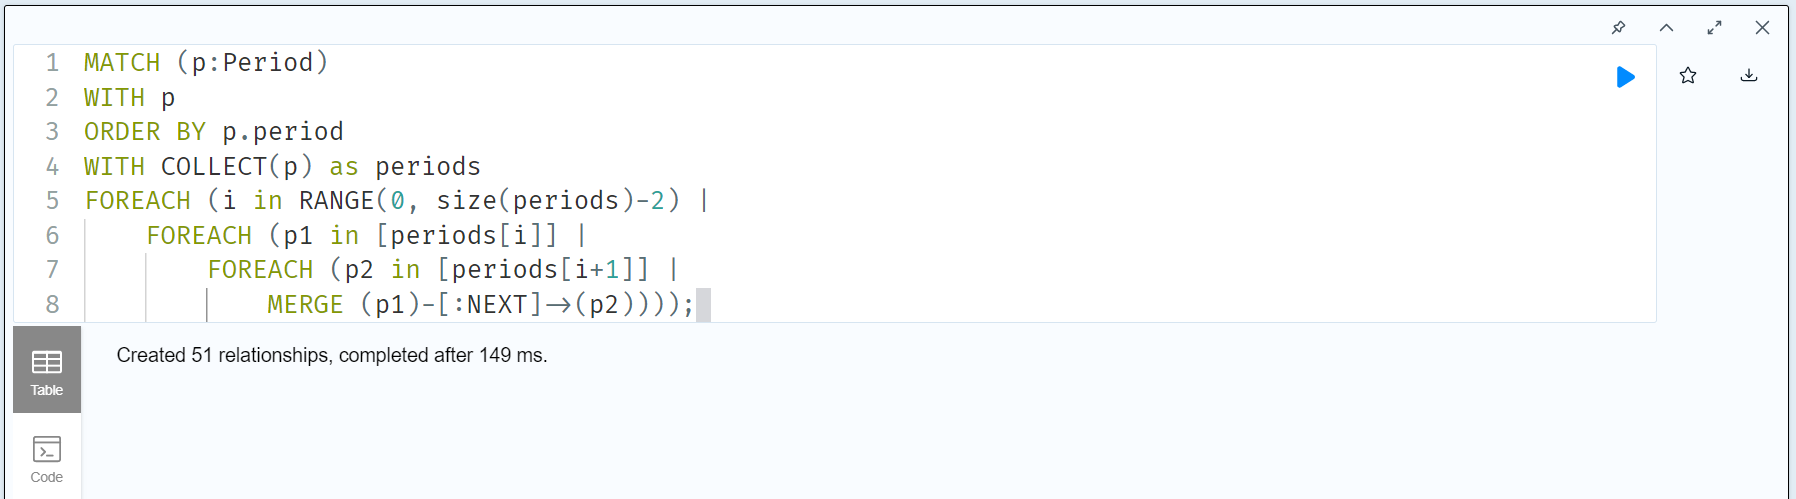

- Kết quả sau khi load các file csv vào Neo4j:

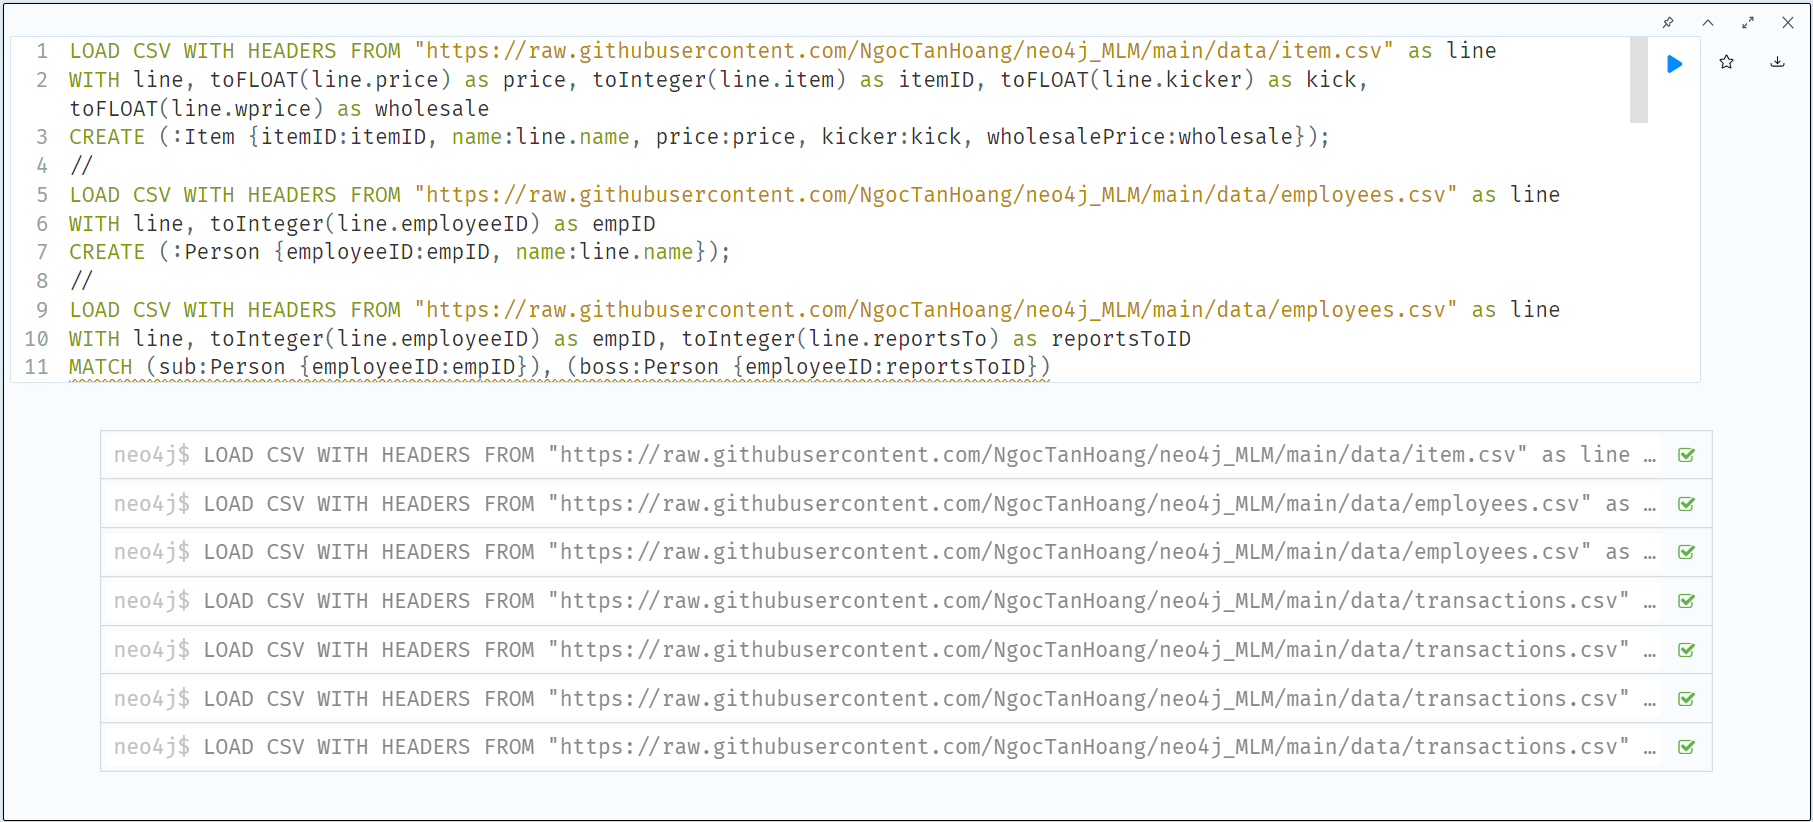

# 4, Các truy vấn đơn giản

### Xem các đại lý và các nhánh của đại lý đó:

 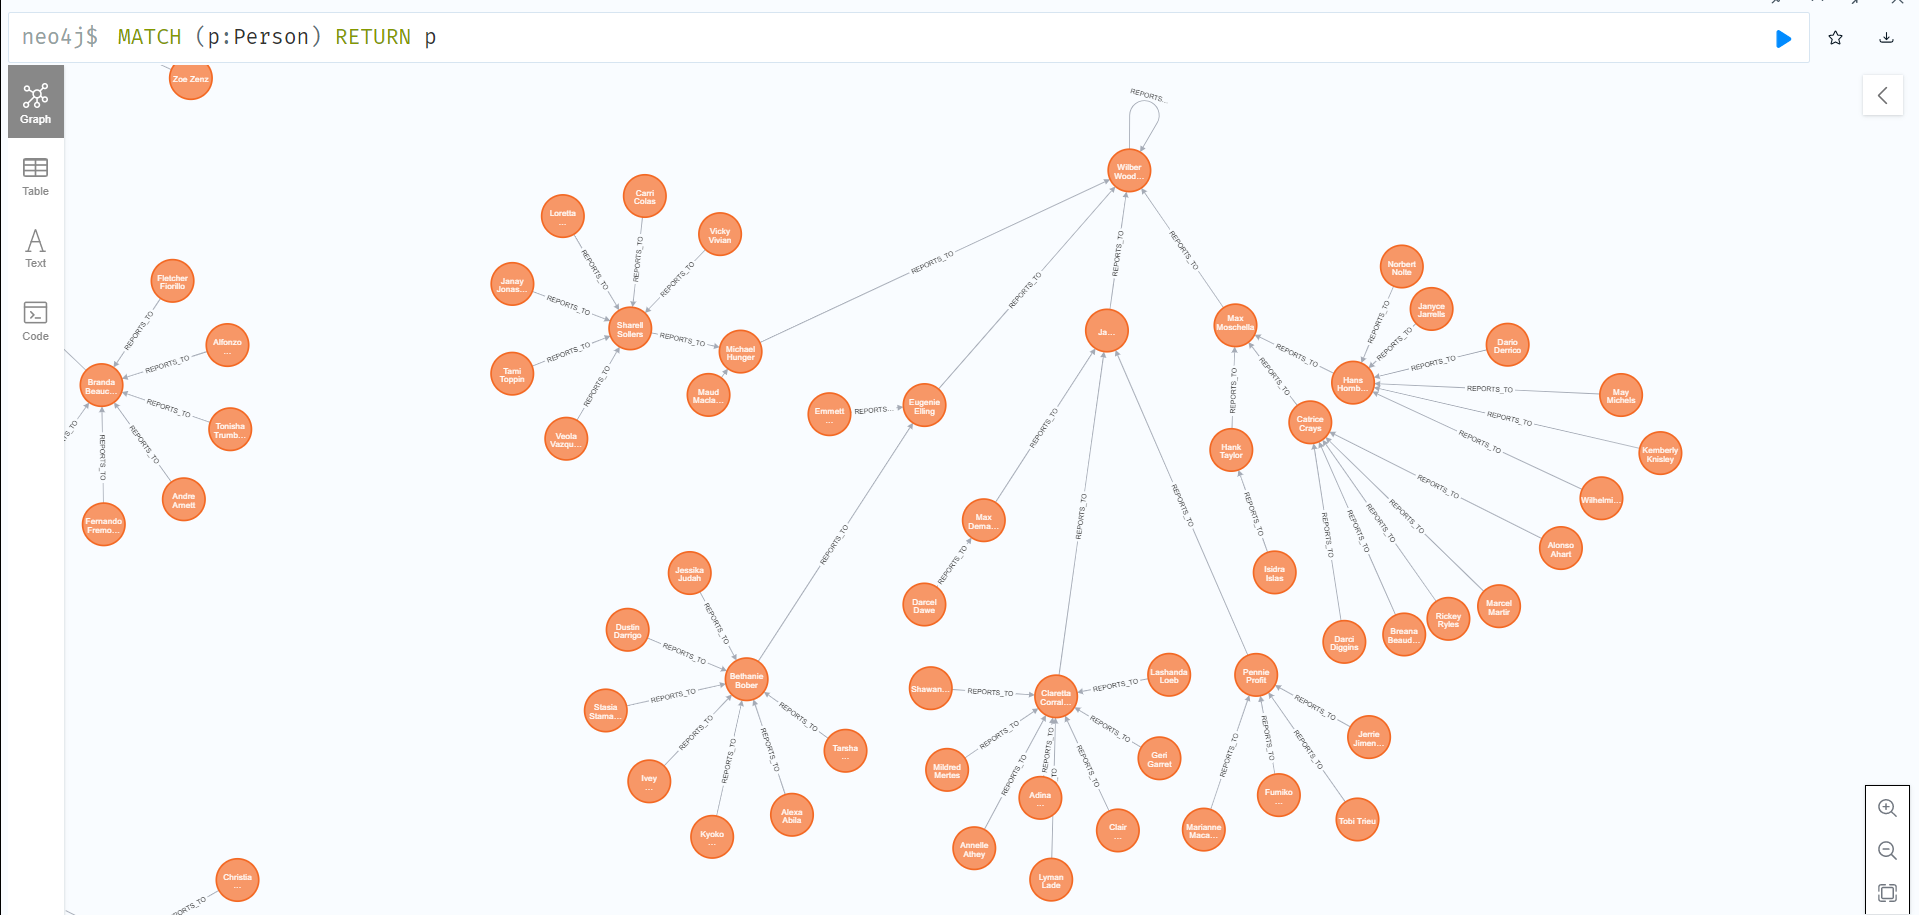

### Vẽ toàn bộ các node và liên kết có trong đồ thị (Do Neo4j giới hạn 500 nodes nên chỉ vẽ được một phần):

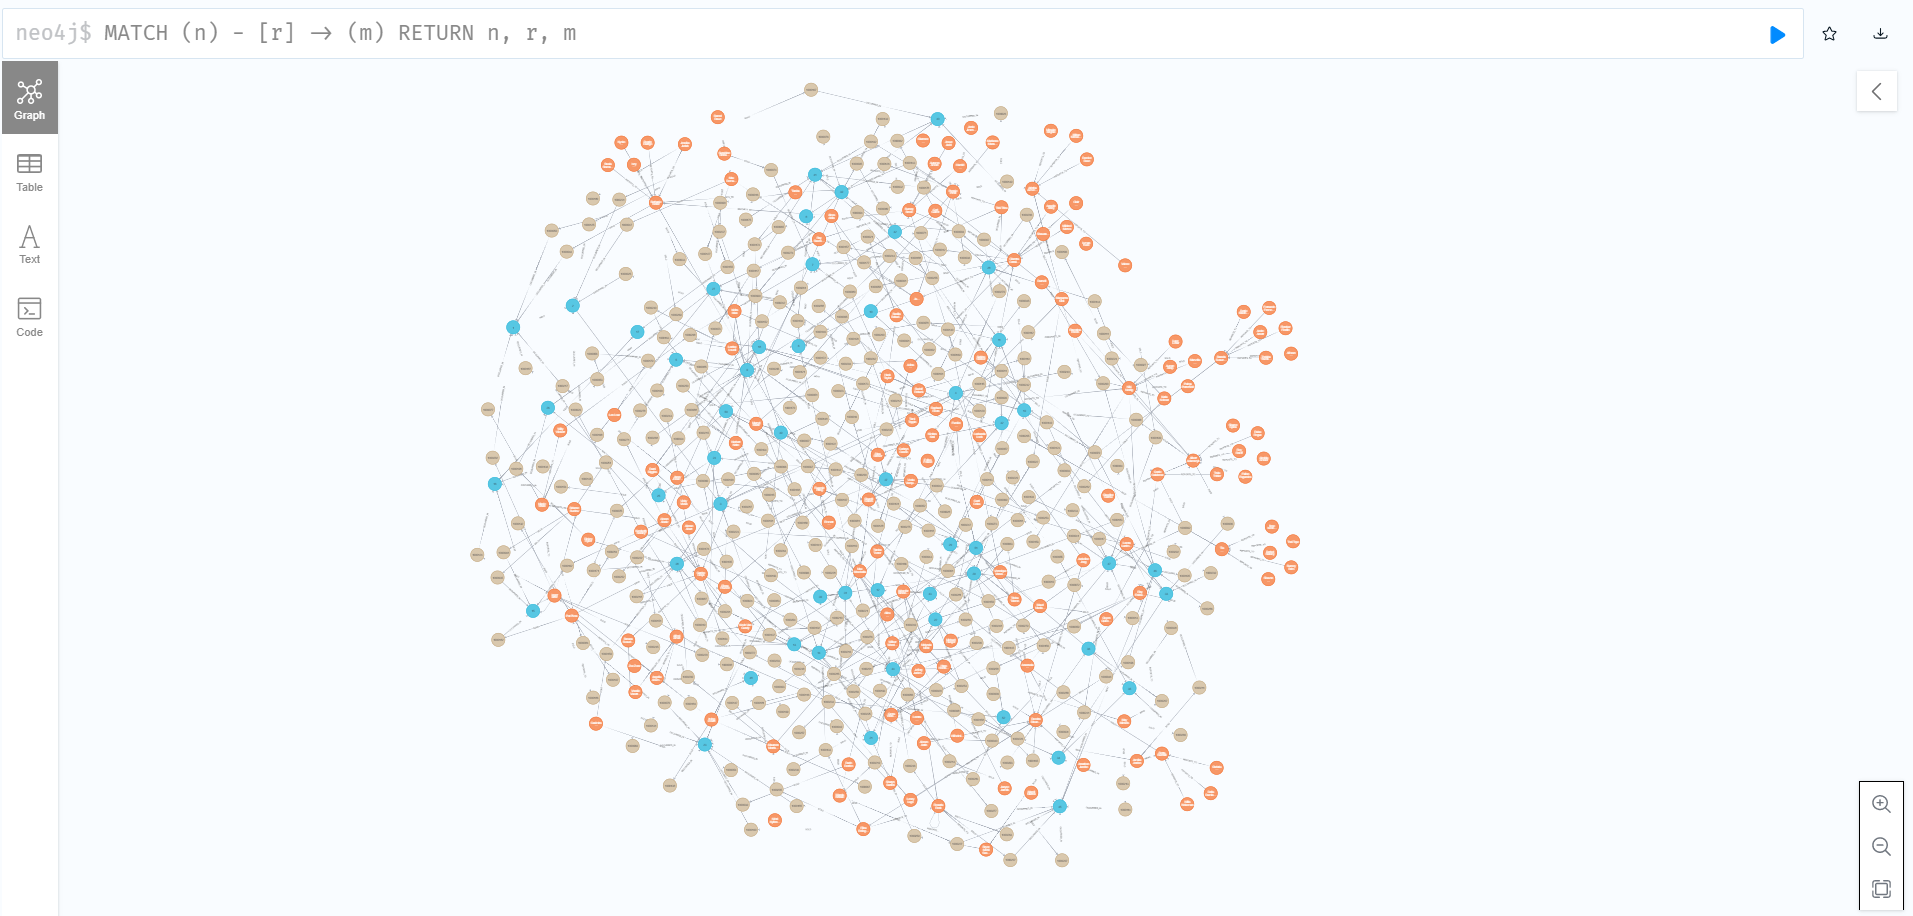

### Những mặt hàng được bán cùng nhau nhiều nhất:

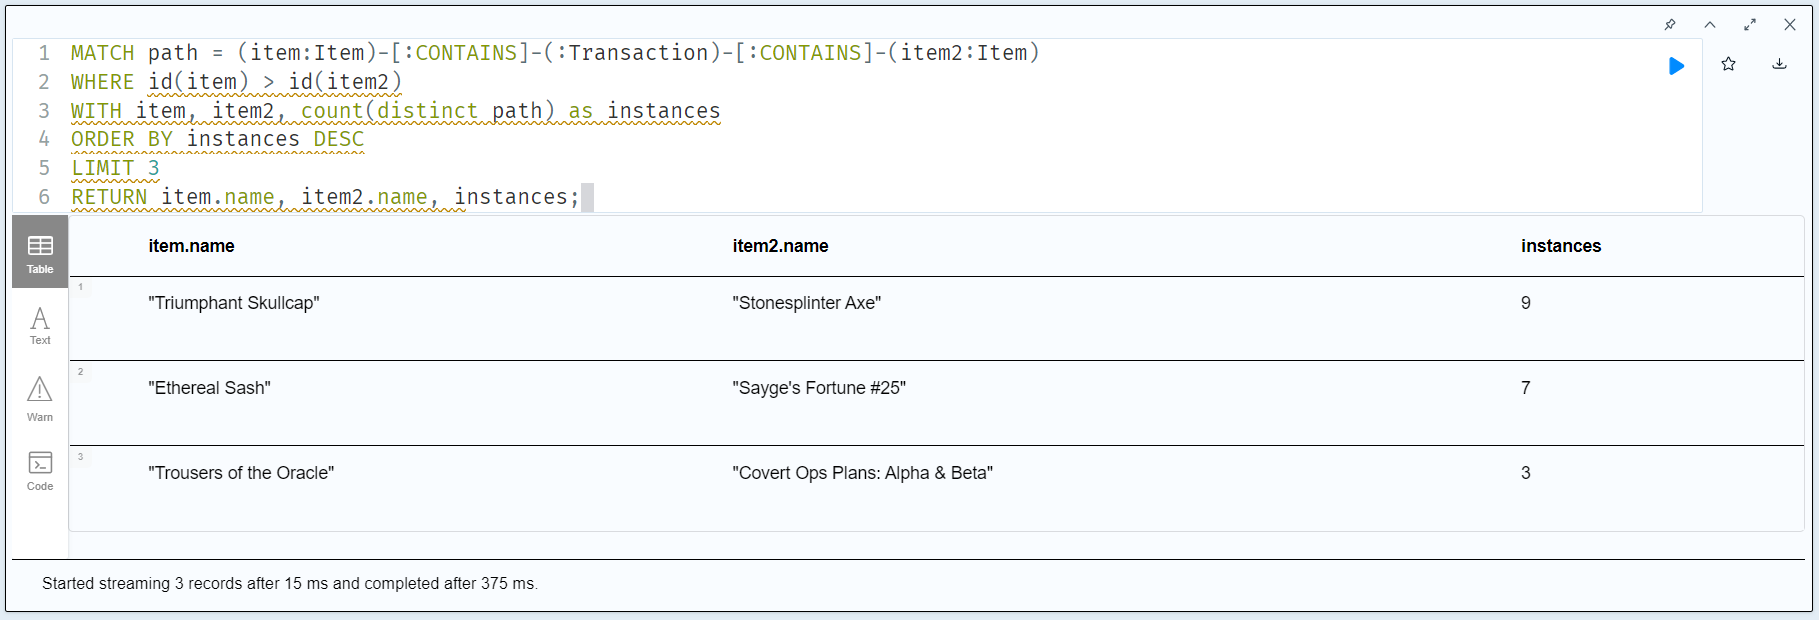

### 5 Mặt hàng được bán nhiều nhất: 

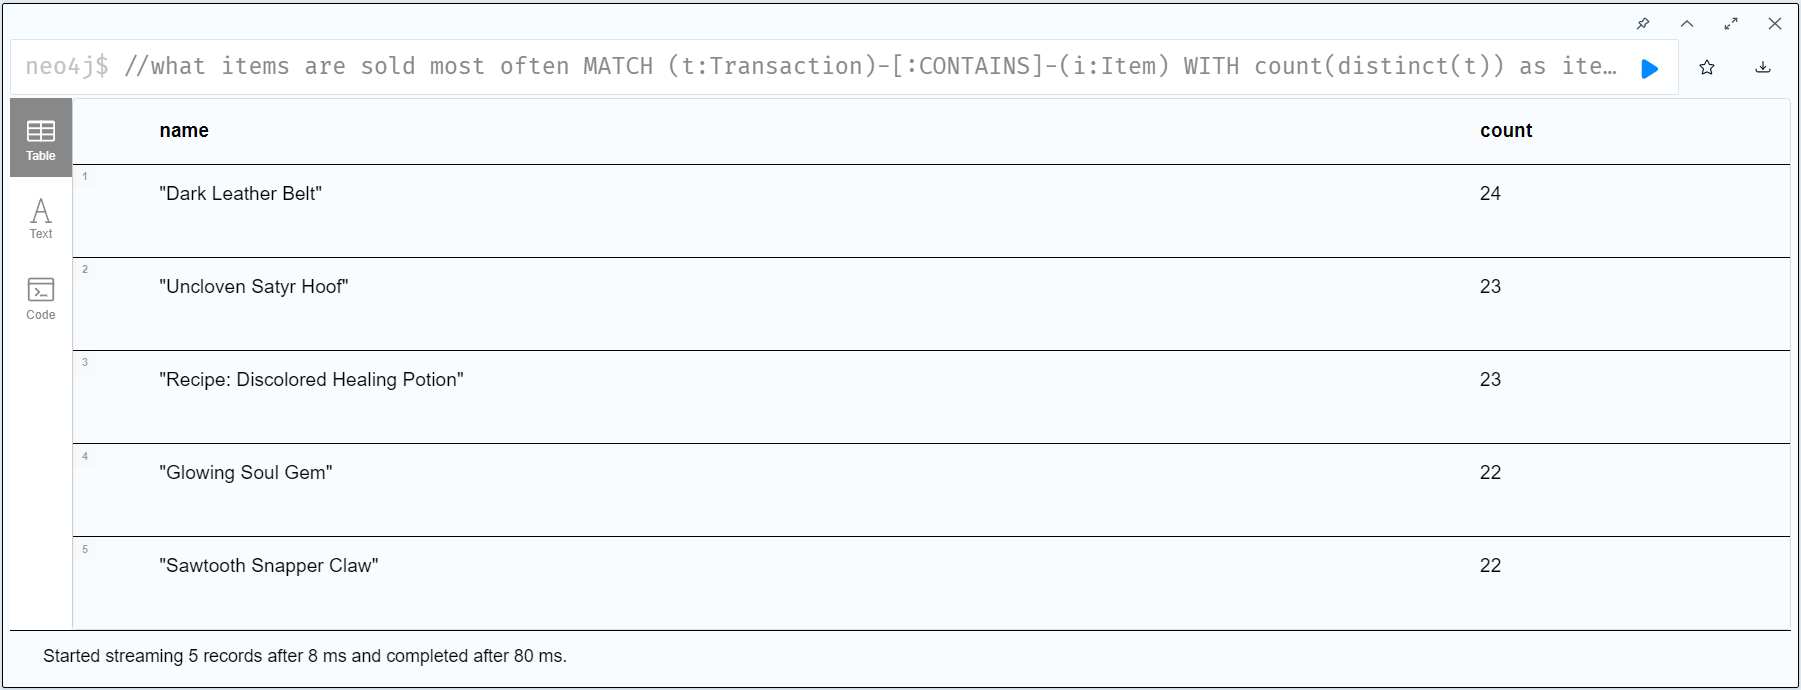

### 10 tuần có doanh thu lớn nhất (sắp xếp giảm dần):

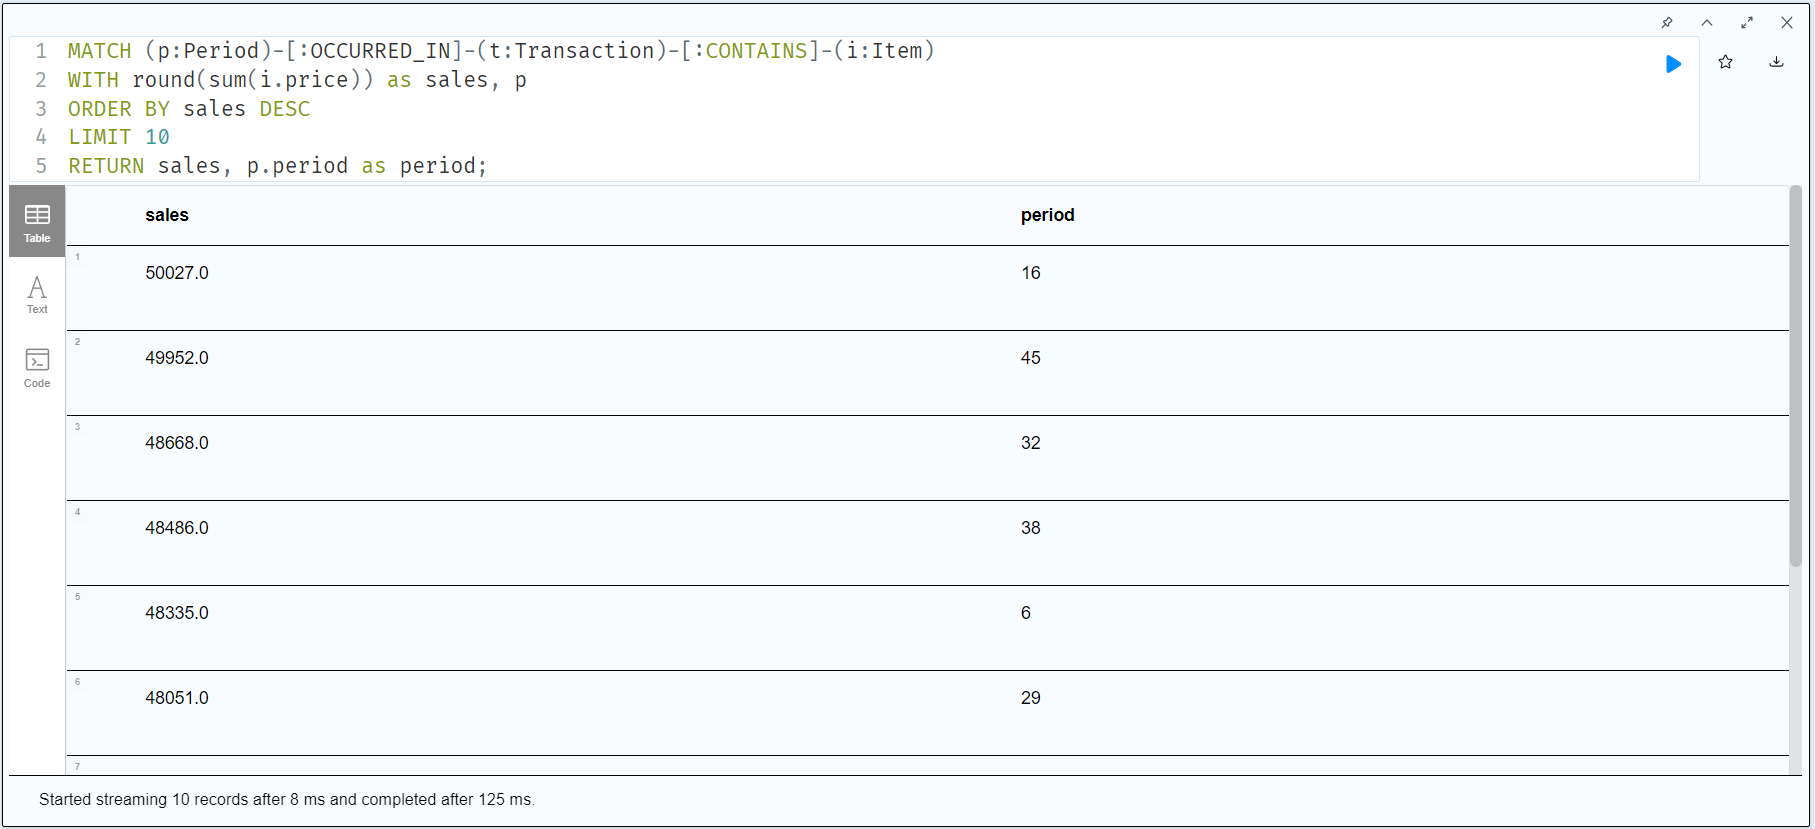

### Top 5 người có doanh thu bán hàng lớn nhất (sắp xếp giảm dần):

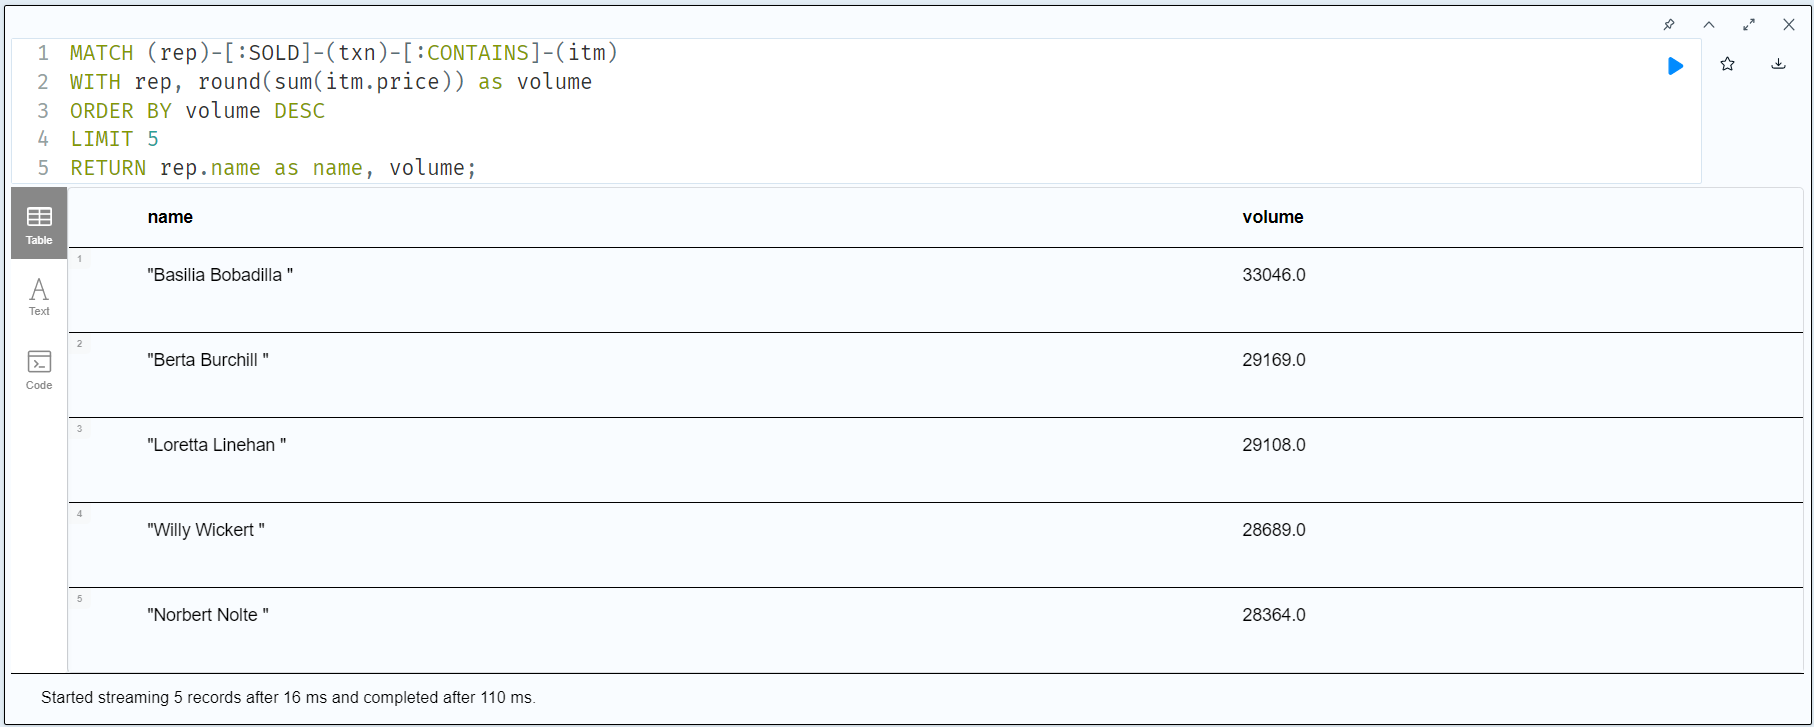

### Top 5 người chốt đơn hàng lớn nhất (sắp xếp giảm dần):

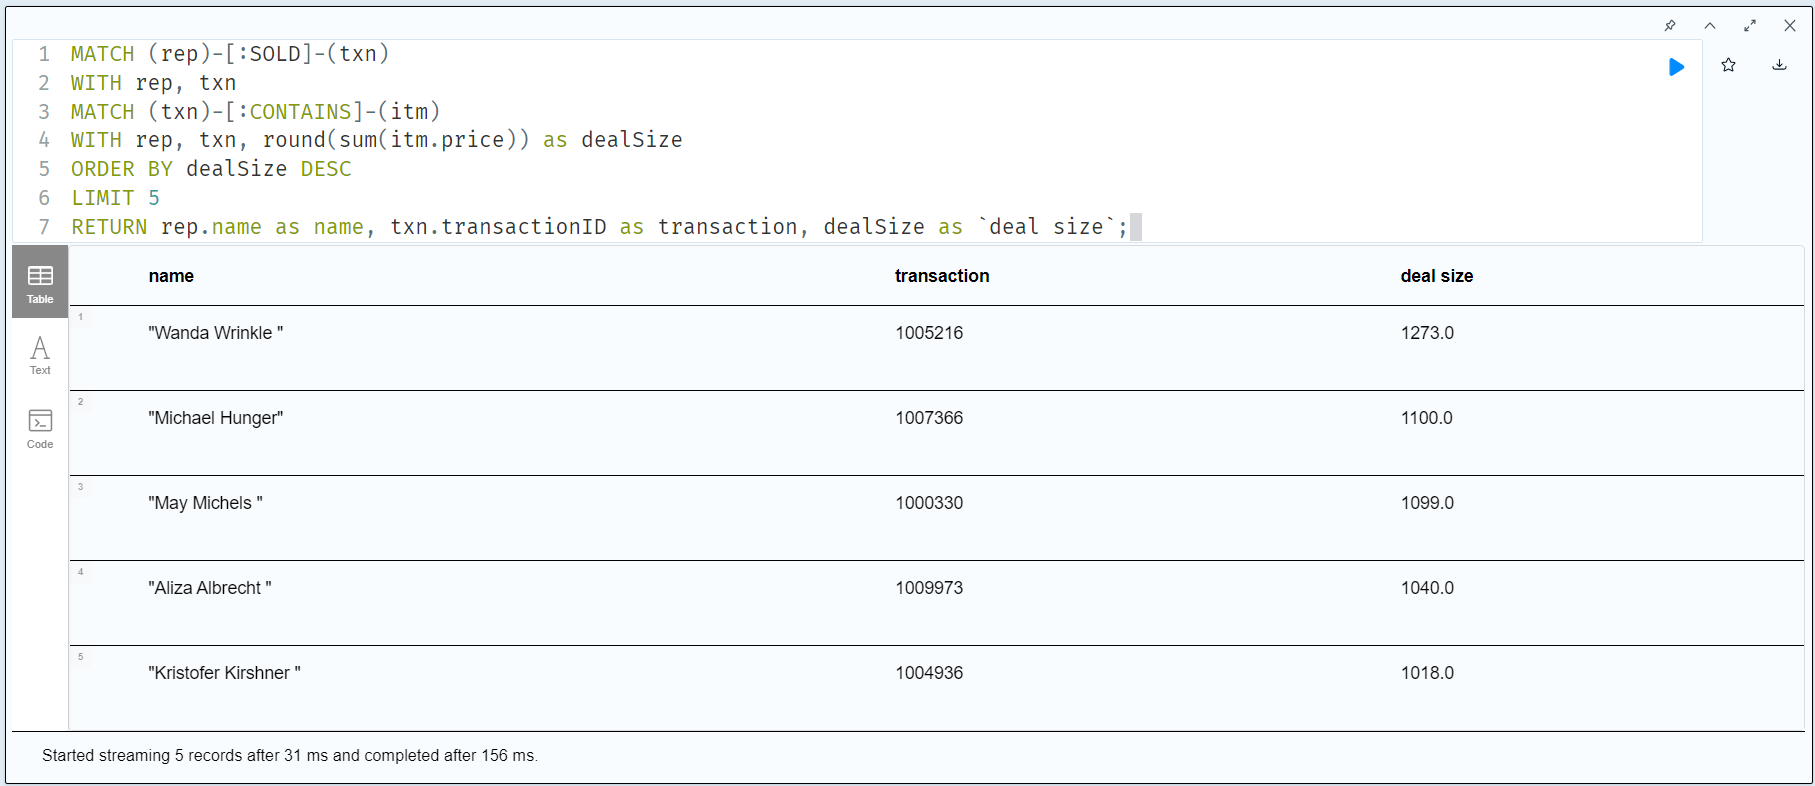

## Hoa hồng cho mỗi đại diện, hàng năm theo quy định về lương thưởng

### Level 1:

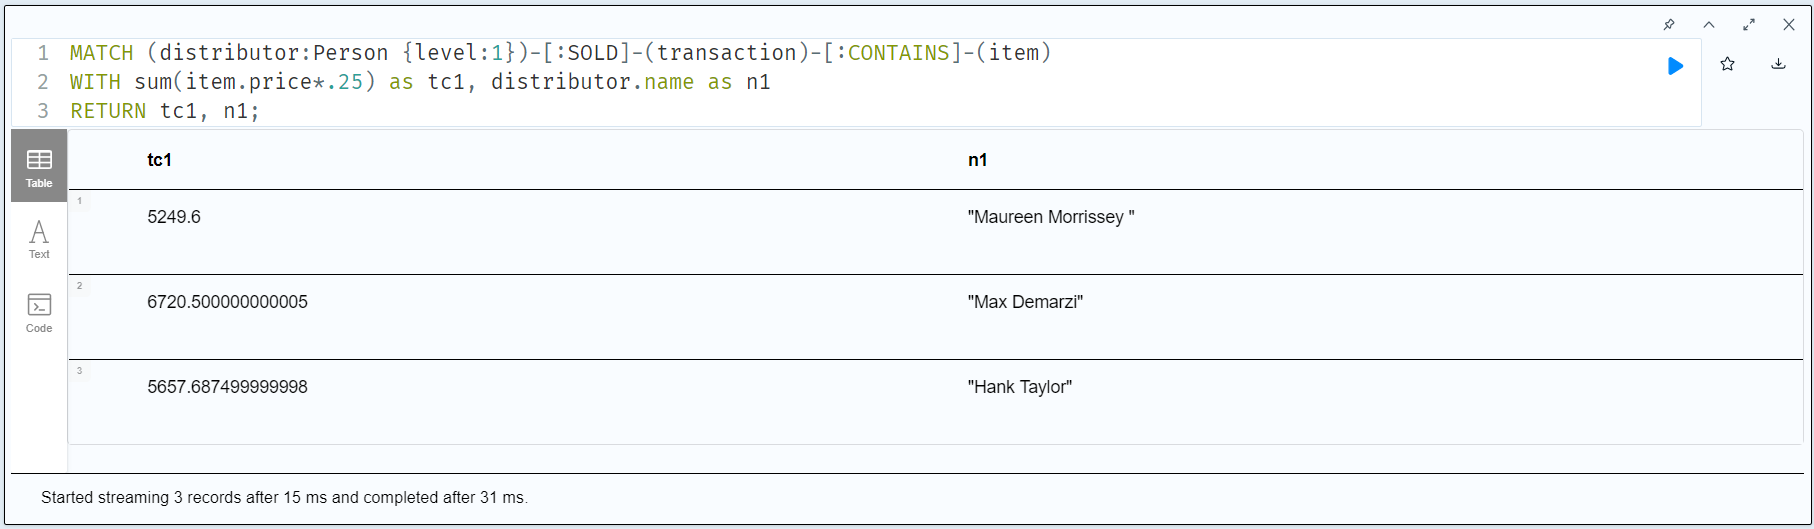

### Level 2:

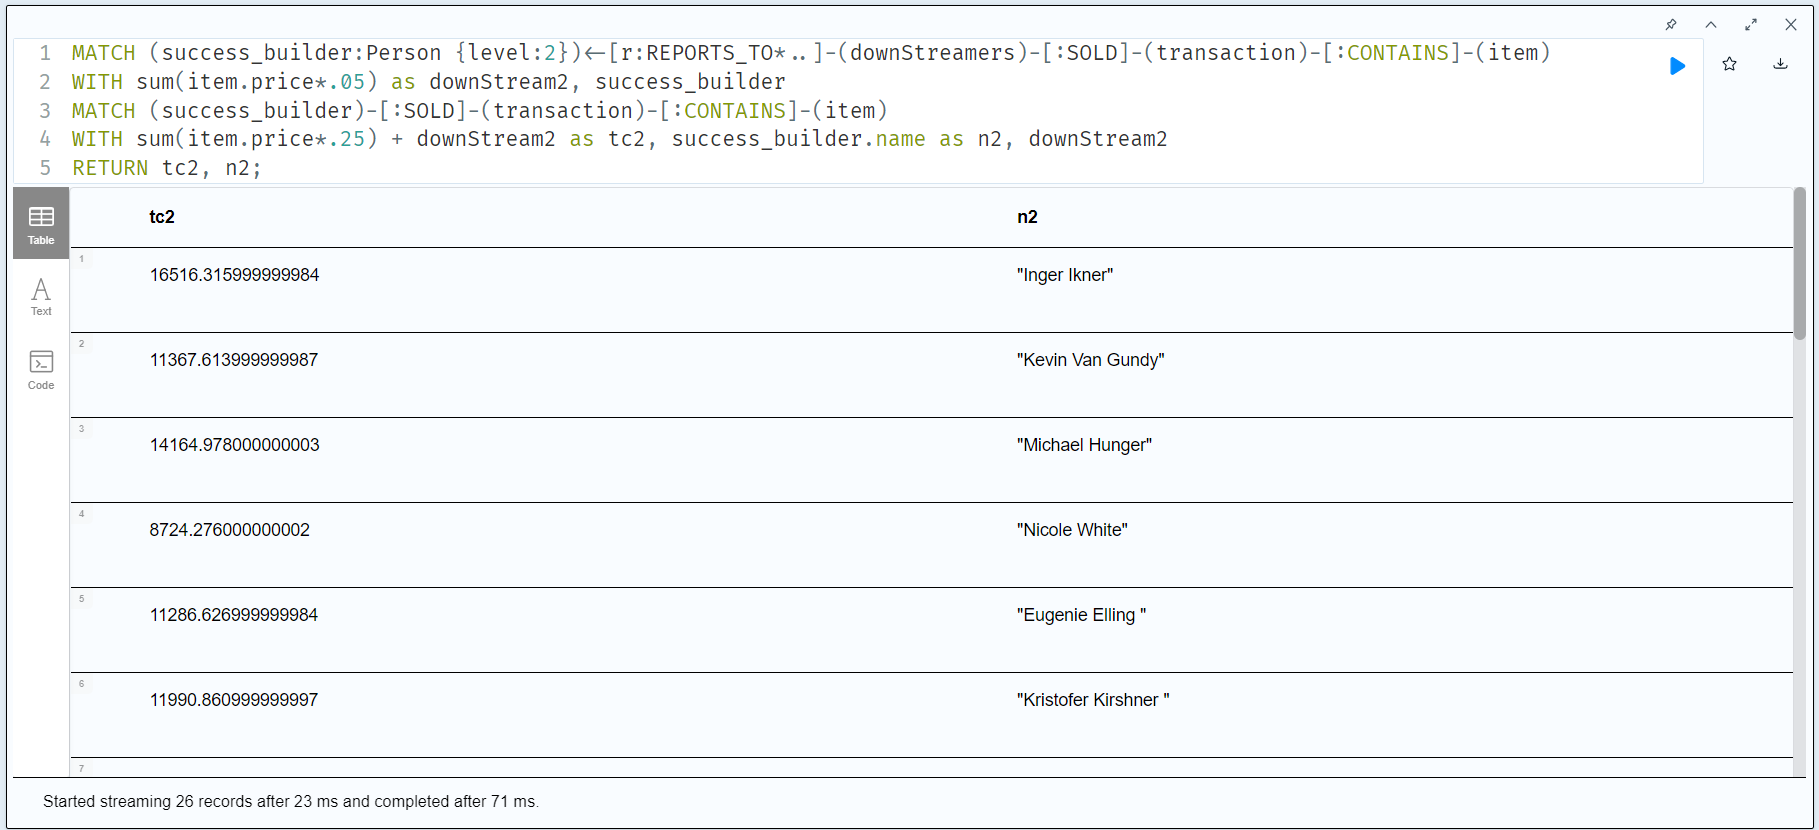

### Level 3:

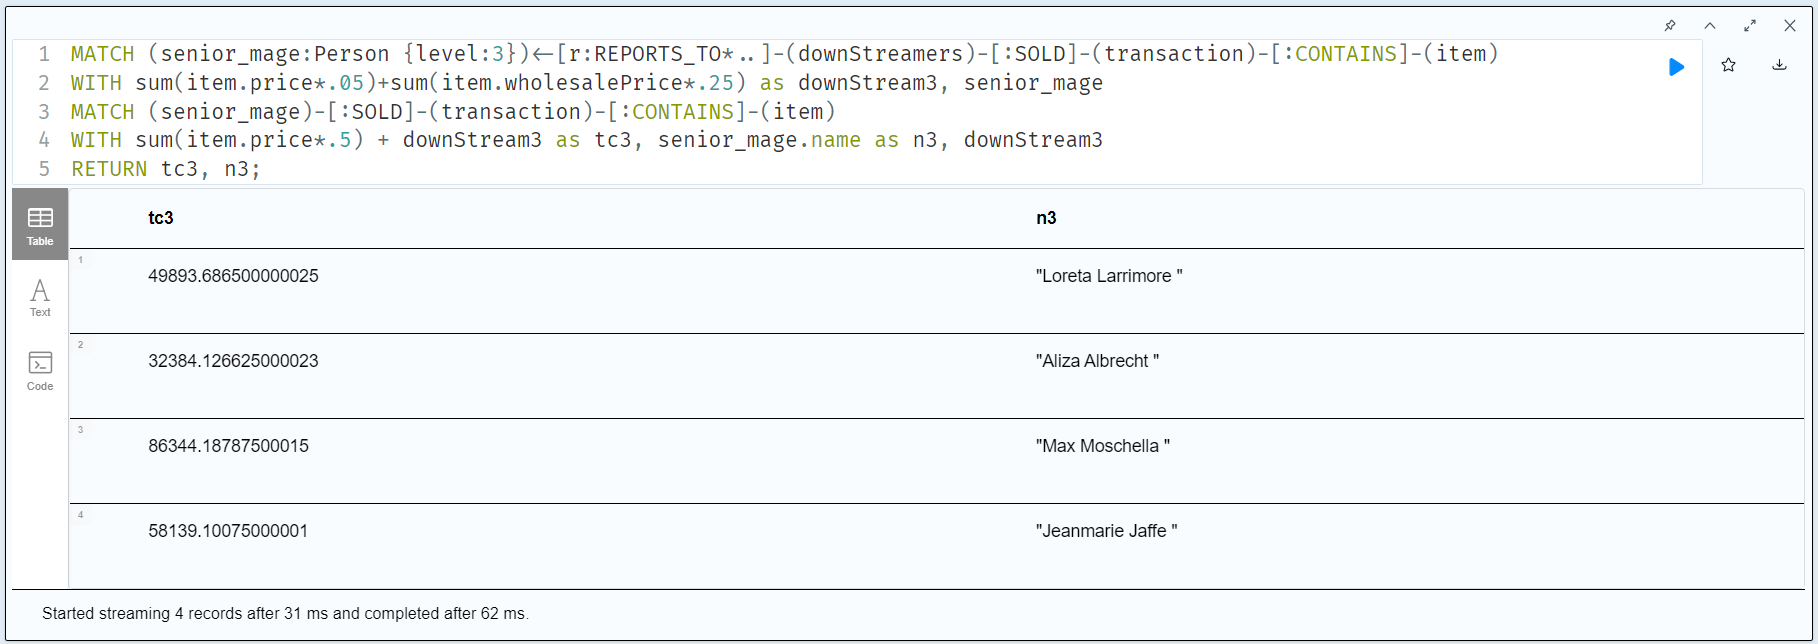

### Level 4:

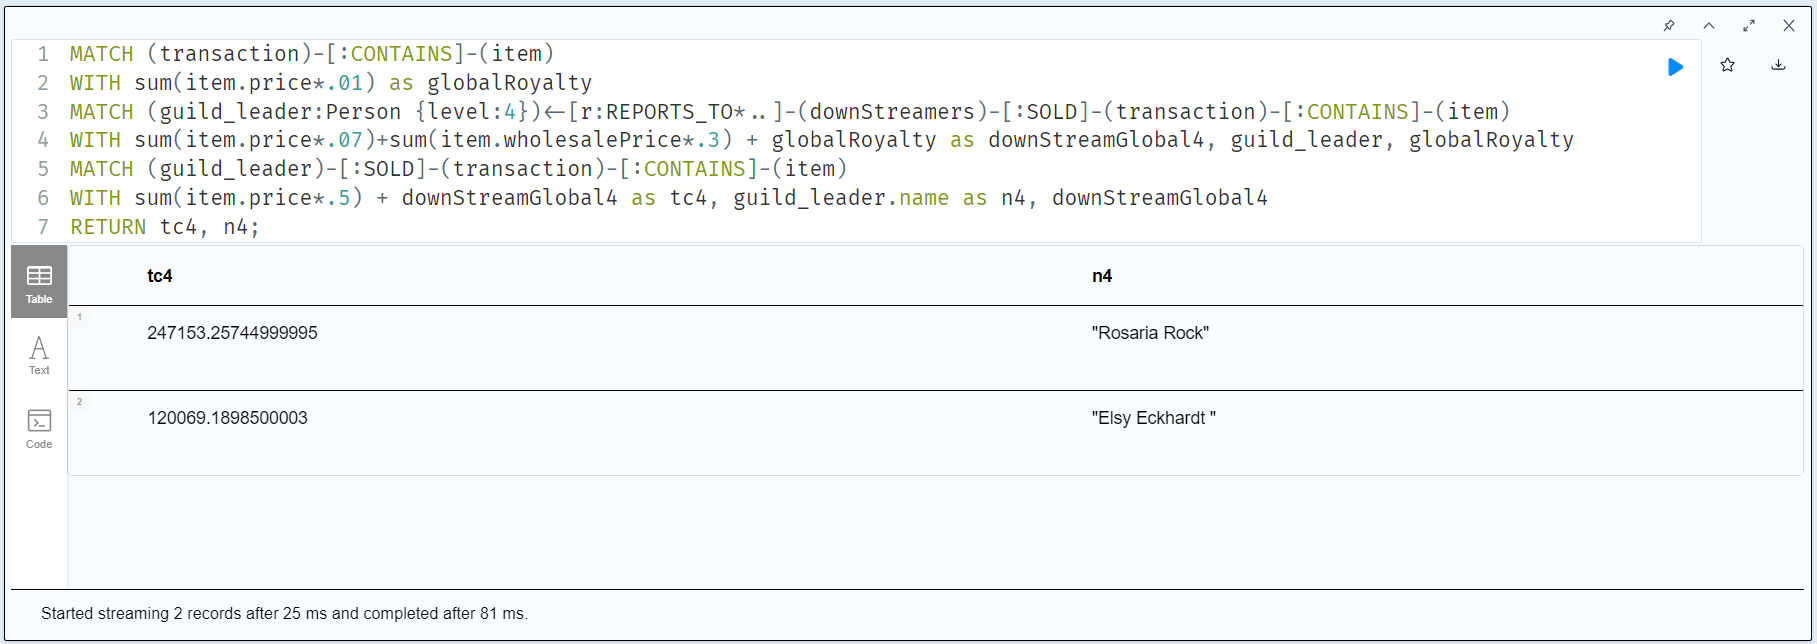

### Level 5:

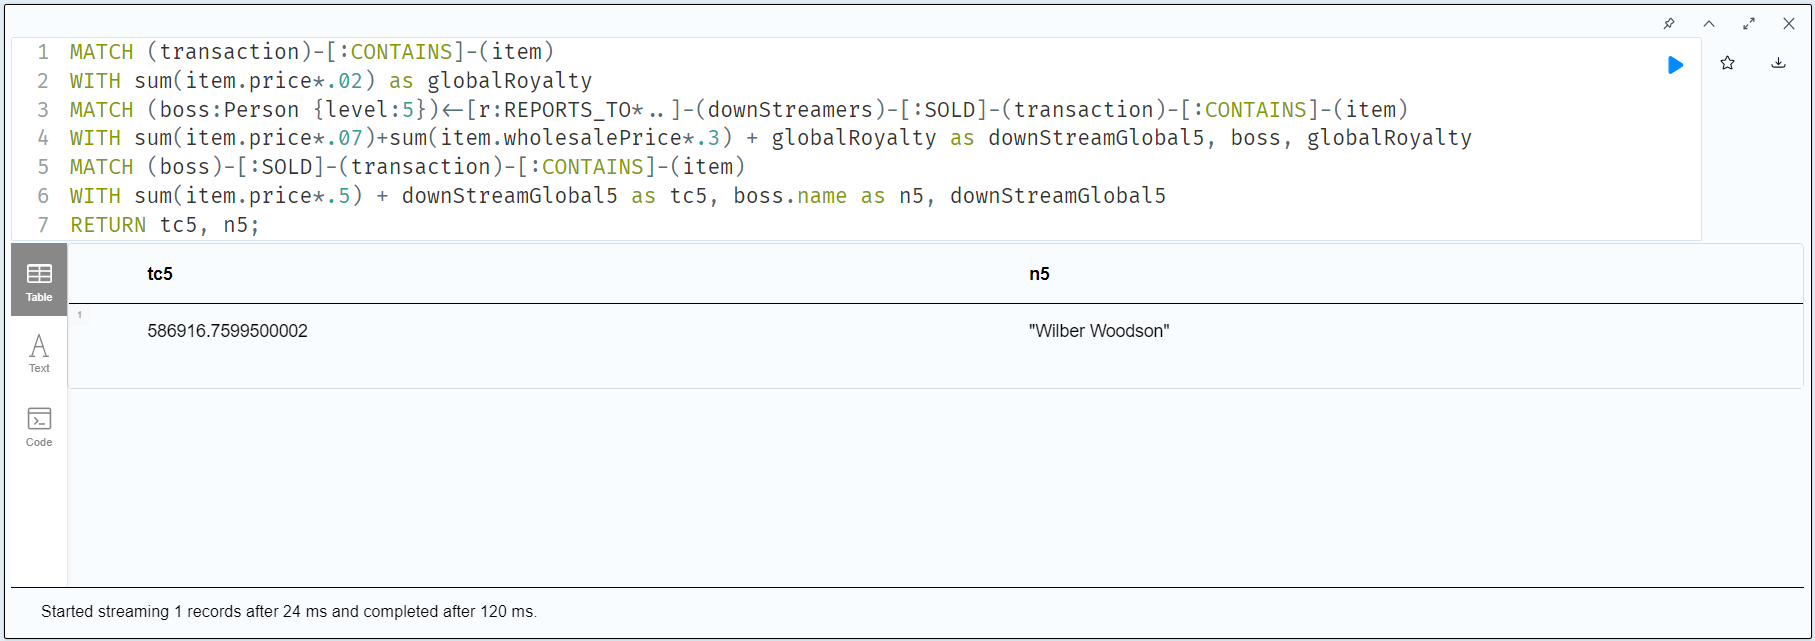

### Level 6:

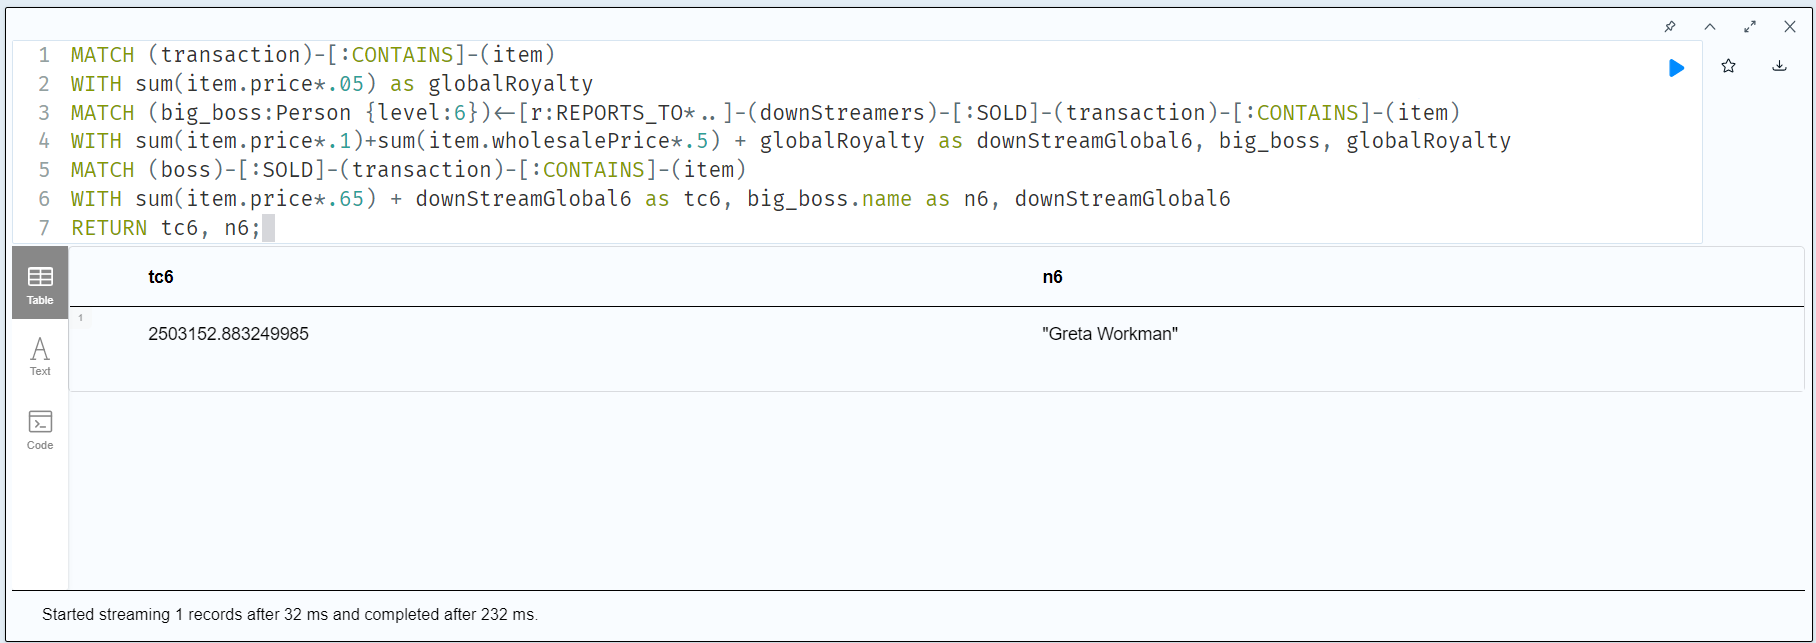

## Hoa hồng theo từng đại diện, theo thời gian quy định

Hoa hồng do mỗi đại diện, theo khoảng thời gian phù hợp với các quy tắc trả hoa hồng

### Ví dụ với level 6:

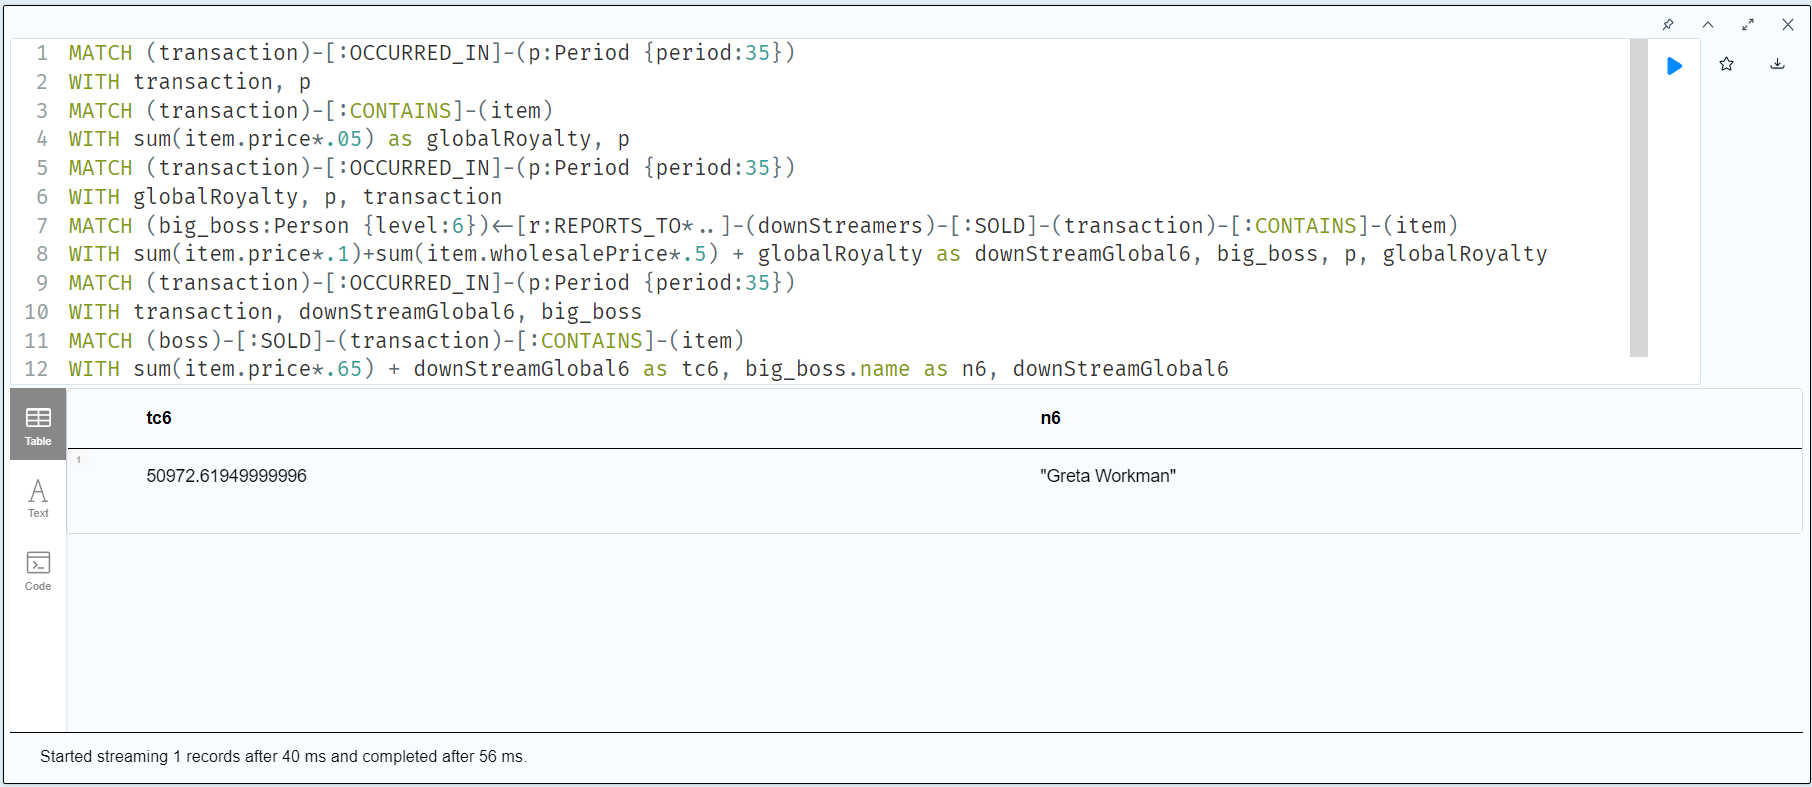